In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import numpy as np
from itertools import cycle

In [183]:
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species']=iris.target
df['species']=df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [184]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [185]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [186]:
df.shape

(150, 5)

In [187]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [188]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [189]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

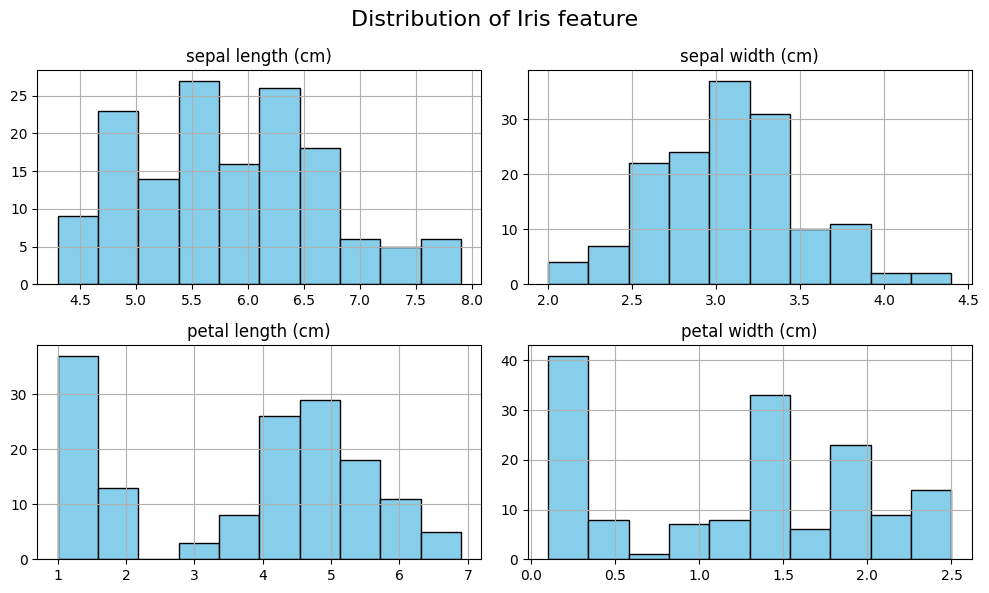

In [190]:
df.hist(figsize=(10,6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Iris feature", fontsize=16)
plt.tight_layout()
plt.show()

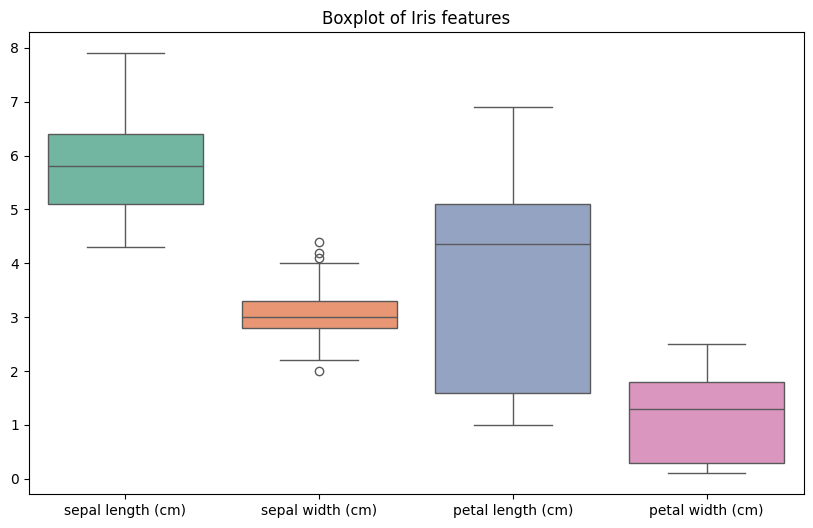

In [191]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=['species']), palette="Set2")
plt.title("Boxplot of Iris features")
plt.show()

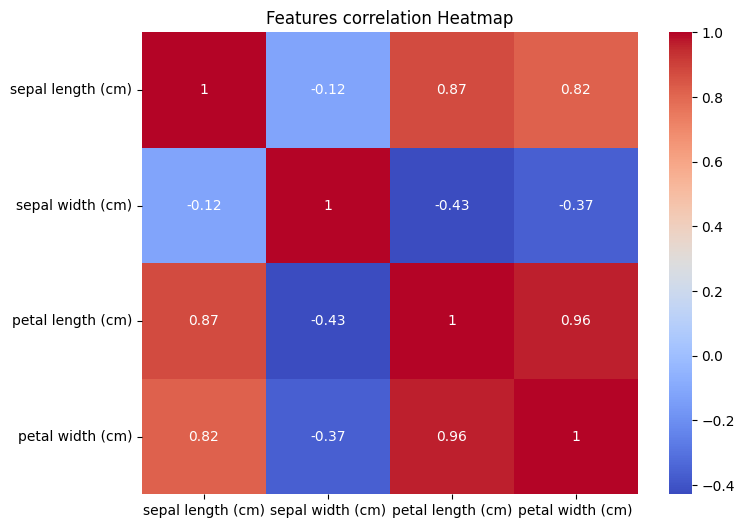

In [192]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title("Features correlation Heatmap")
plt.show()

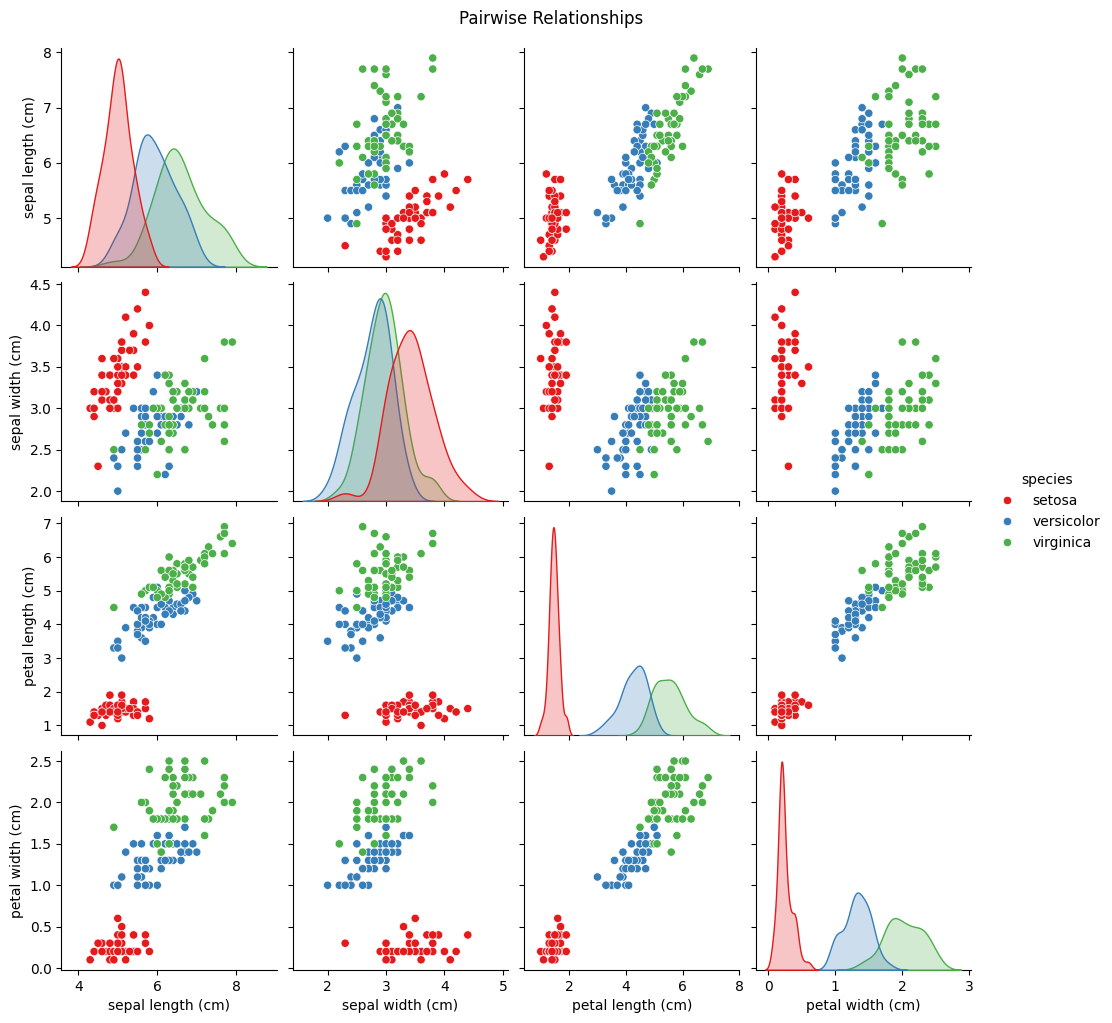

In [193]:
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [194]:
X=iris.data
y=iris.target

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)

In [198]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [199]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_preds)

In [200]:
print("Accuracy of Models:")
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")

Accuracy of Models:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 1.00


In [201]:
print("\n Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

print("\n Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("\n SVM Classification Report:")
print(classification_report(y_test, svm_preds))


 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.0

In [202]:
def plot_decision_boundary(model, X, y, title, scaled=False):
    X_vis = X[:, :2]  # Use only first 2 features (sepal length & width)
    if scaled:
        X_vis = scaler.fit_transform(X_vis)
        x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaled:
        model.fit(X_vis, y)
        Z = model.predict(grid)
    else:
        model.fit(X_vis, y)
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

In [203]:
def plot_decision_boundary(model, X, y, title, scaled=False):
    X_vis = X[:, :2]  # Use only first 2 features (sepal length & width)
    if scaled:
        X_vis = scaler.fit_transform(X_vis)

    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaled:
        model.fit(X_vis, y)
        Z = model.predict(grid)
    else:
        model.fit(X_vis, y)
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.6)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(title)
    plt.show()

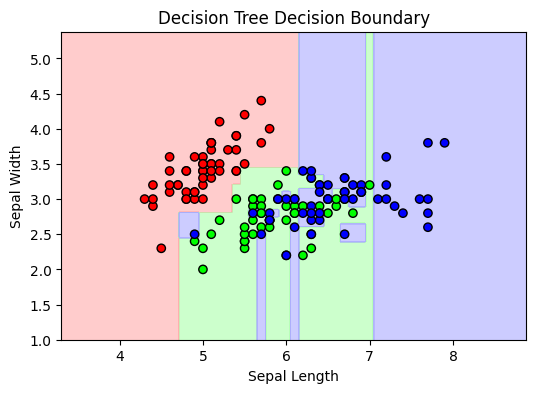

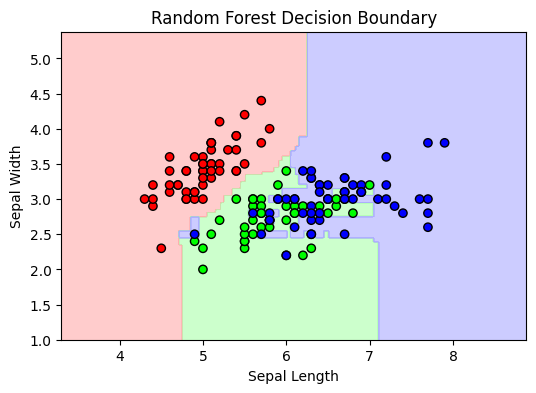

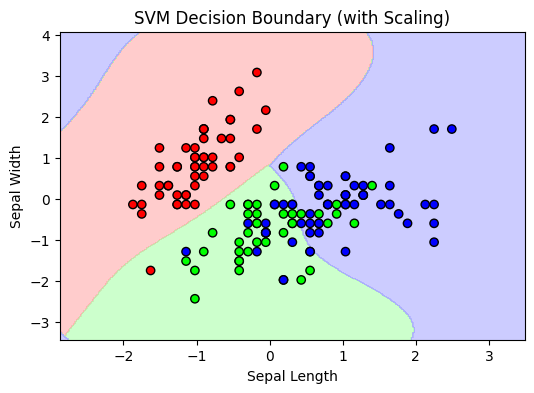

In [204]:
plot_decision_boundary(DecisionTreeClassifier(), X, y, "Decision Tree Decision Boundary")
plot_decision_boundary(RandomForestClassifier(), X, y, "Random Forest Decision Boundary")
plot_decision_boundary(SVC(), X, y, "SVM Decision Boundary (with Scaling)", scaled=True)

In [205]:
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

In [206]:
dt_probs = dt_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
svm_probs = svm_model.decision_function(X_test_scaled)

In [207]:
def plot_multiclass_roc(y_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    plt.figure(figsize=(8,6))

    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,
                label=f'Class {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

C:\Users\amitk\AppData\Local\Temp\ipykernel_30956\2208509160.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


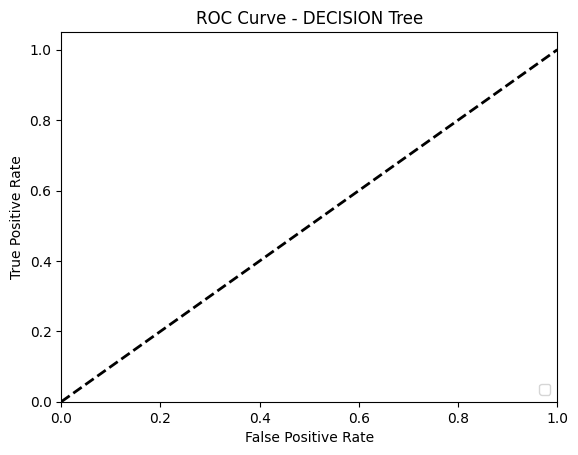

In [208]:
    model_name = "DECISION Tree"
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

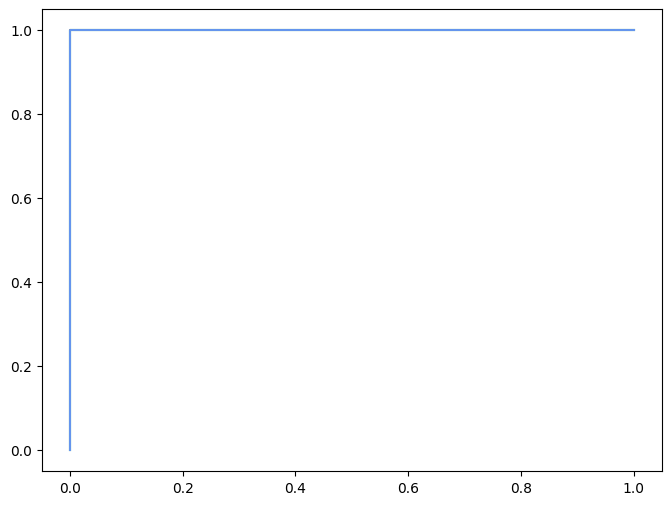

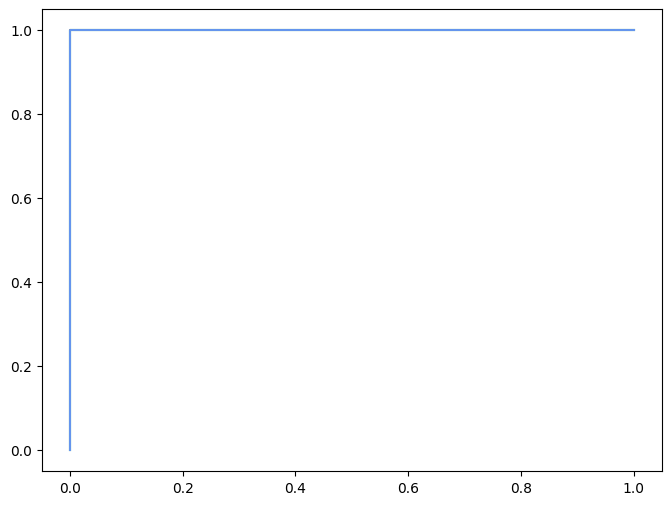

In [209]:
plot_multiclass_roc(y_bin, dt_probs, "Decision Tree")
plot_multiclass_roc(y_bin, rf_probs, "Random Forest")

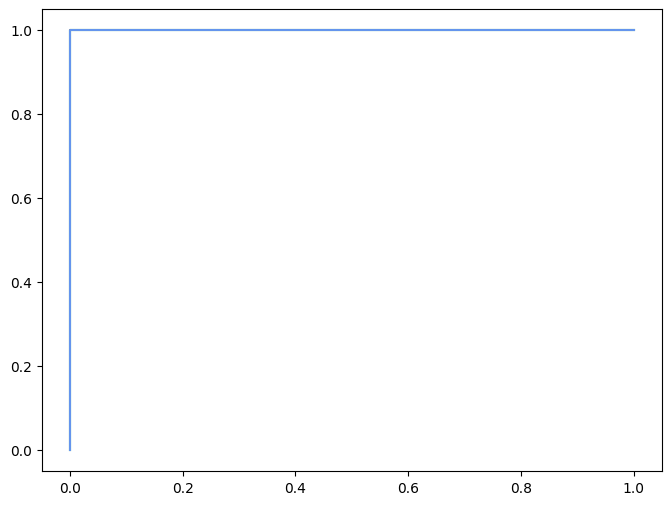

In [210]:
plot_multiclass_roc(y_bin, svm_probs, "SVM")

In [211]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [212]:
for name, model in [("Decision Tree", dt), ("Random Forest", rf), ("SVM", svm)]:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name}: {scores.mean():.2%} ± {scores.std():.2%}")

Decision Tree: 95.33% ± 3.40%
Random Forest: 94.67% ± 2.67%
SVM: 96.00% ± 3.89%


In [213]:
def evaluate_model(model, X_train, X_test, y_train, y_test, class_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    print("Confusion Matrix:")
    print(cm)

    return {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', Pipeline([('scaler', StandardScaler()), ('svc', SVC())])),
]
class_names = iris.target_names

for name, model in models:
    print(f"\n Evaluating: {name}")
    evaluate_model(model, X_train, X_test, y_train, y_test, class_names)


 Evaluating: Decision Tree
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Evaluating: Random Forest
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Evaluating: SVM
Classifi